In [11]:
%reload_ext autoreload
%autoreload 2

from spice_net import *
from helpers import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Generate Dataset

[-0.41540985  0.64728291] -10.0


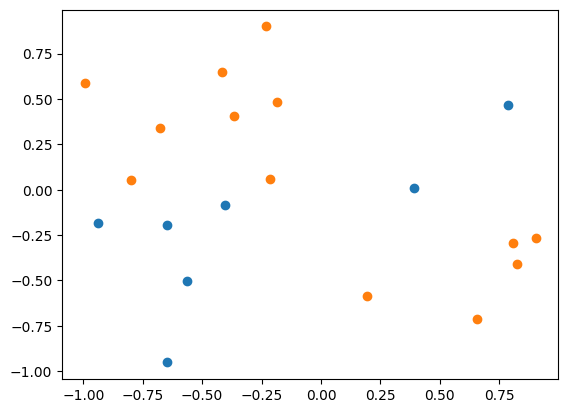

In [18]:
n = 20 

xs = np.random.uniform(-1, 1, size=(n, 2))
ys = np.sign(np.prod(xs, axis=1))*10
plt.scatter(*xs[ys>0].T)
plt.scatter(*xs[~(ys>0)].T)
print(xs[0], ys[0])

### Generate linear and nonlinear networkx

In [76]:
# Parameters
nodes = 12
edge_prob = .8
diode_prob = 1.
con_graph = nx.erdos_renyi_graph(n=nodes, p=edge_prob)
diodes, res = 0, 0
stack = []
for u, v in con_graph.edges():
    if np.random.rand() < diode_prob:
        diodes += 1
        stack.append((u, v)) # for coupled diode/resistor edges only
        con_graph[u][v]['type'] = 'diode'
        con_graph[u][v]['to'] = np.random.choice([u, v])
    else:
        con_graph[u][v]['type'] = 'resistor'
        con_graph[u][v]['weight'] = 1./np.random.rand() 
        res += 1
for u, v in stack:
    diodes += 1
    con_graph.remove_edge(u, v)
    dn = con_graph.number_of_nodes()
    con_graph.add_node(dn)
    con_graph.add_edge(u, dn, type='diode', to=np.random.choice([u, dn]))
    con_graph.add_edge(dn, v, type='resistor', weight=1./np.random.rand())

print('Num edges:', diodes + res)
print('Num purely resistor:', res)
print('Num diodes:', diodes)

in_nodes = 2
out_nodes = 1
node_cfg = np.random.permutation([1]*in_nodes + [-1]*out_nodes + [0]*(nodes-in_nodes-out_nodes-1))
node_cfg = np.random.choice(nodes, size=(in_nodes + out_nodes, 2), replace=False)
node_cfg = (node_cfg[:in_nodes], node_cfg[in_nodes:])
node_cfg

lin_graph = nx.subgraph_view(con_graph, filter_edge=res_filter).to_undirected(as_view=True)

Num edges: 98
Num purely resistor: 0
Num diodes: 98


DiGraph with 61 nodes and 0 edges


TypeError: type NoneType doesn't define __round__ method

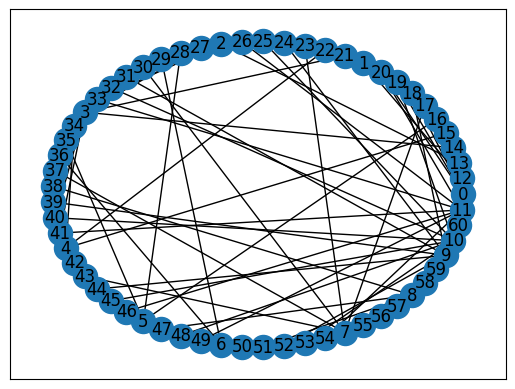

In [77]:
lin = LinearNetwork('linear', con_graph, node_cfg)
non = NonLinearNetwork('nonlinear', con_graph, node_cfg)

visualize(lin)

In [78]:
visualize(non)

True True
True True
True True
True True
True True
True True
True True
True True
True True
False False
False False
False False
False False
False False
False False
False False
False False
True True
False False
False False
False False
False False
False False
False False
False False
False False
True True
False False
False False
False False
False False
False False
False False
False False
False False


AssertionError: []

### Train both networks

In [79]:
# Train linear network
epochs = 10
# lin_dat = train(lin, xs, ys, epochs, gamma=10, eta=0.1)
non_dat = train(non, xs, ys, epochs, gamma=10, eta=0.1)

Epoch 1: 99.00735429737188
Epoch 2: 99.1752722369869
Epoch 3: 99.44287670876804
Epoch 4: 99.02358142126035
Epoch 5: 99.44864459019493
Epoch 6: 99.20927033154184
Epoch 7: 98.99434143930128
Epoch 8: 99.49264687376304
Epoch 9: 99.1241652123573
Epoch 10: 98.62016221581139


## Evaluate networks

In [72]:
y_lin = np.concatenate([lin.predict(x) for x in xs])
y_non = np.concatenate([non.predict(x) for x in xs])

In [73]:
y_non

array([-0.5456422 , -0.40845218, -0.52545381,  0.0444492 , -0.75888604,
        0.14626783, -0.45451373,  0.15440516, -0.28332654, -0.0483089 ,
       -0.43108428, -0.69012481,  0.39748743, -0.49123055, -0.34195867,
       -0.04194521,  0.06567614,  0.70581734, -0.22963887, -0.26814559])

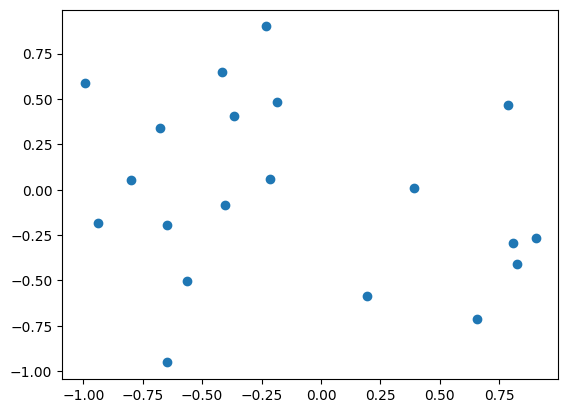

In [74]:
plt.scatter(*xs[y_lin>0].T)
plt.scatter(*xs[~(y_lin>0)].T)

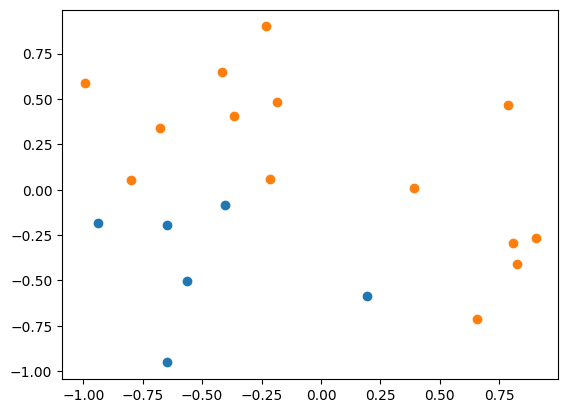

In [75]:
plt.scatter(*xs[y_non>0].T)
plt.scatter(*xs[~(y_non>0)].T)